<a href="https://colab.research.google.com/github/safaa400/safaasalah_46-17921_ML_assignments/blob/main/Customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [60]:
customer_df=pd.read_csv('Customer data.csv')
customer_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [61]:
X_train=customer_df.iloc[:,[1,2,3,4,5,6,7]].values  

# Kmeans

In [62]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# # y_kmeans = kmeans.fit_predict(X_train)
# # #Visualising the clusters
# # plt.scatter(X_train[y_kmeans == 0, 1], X_train[y_kmeans == 0, 2], s = 100, c = 'purple', label = 'Iris-setosa')
# # plt.scatter(X_train[y_kmeans == 1, 1], X_train[y_kmeans == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
# # plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# # #Plotting the centroids of the clusters
# # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# # plt.legend()
# # inertia=kmeans.inertia_
# # num_iterations=kmeans.n_iter_
# # print('interia:',inertia)
# # print('The number of iterations required to converge:',num_iterations)

In [63]:
# kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# y_kmeans = kmeans.fit_predict(X_train)
# #Visualising the clusters
# plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
# plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
# plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# #Plotting the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# plt.legend()
# inertia=kmeans.inertia_
# num_iterations=kmeans.n_iter_
# print('interia:',inertia)
# print('The number of iterations required to converge:',num_iterations)

SSE_values [2903113032648.6416, 1214580027362.171, 673036781440.1233, 377129345438.10706, 248986947113.3496, 176635351960.57294] 
 k_values [1, 2, 3, 4, 5, 6]


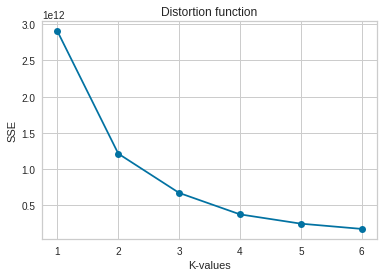

In [64]:
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
SSE_values, k_values=find_best_clusters(X_train,7)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.title('The elbow method')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.title('Distortion function')
plt.show()

## Using Elbow method 

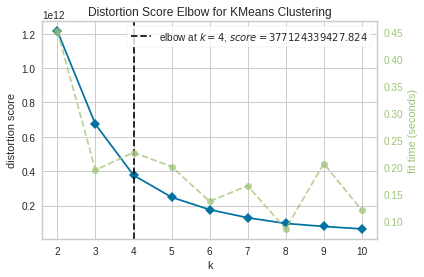

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

_ K=4 is the best using elbow method 

## silhouette_score

silhouette_scores [0.5125390340067693, 0.5428531732146846, 0.5401417522540799, 0.5424101948482385, 0.5315842642701275, 0.5407694810150181] 
 k_values [3, 4, 5, 6, 7, 8]


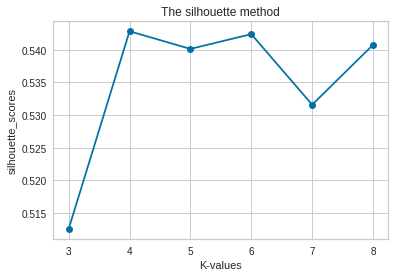

In [66]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(3, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,9)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

_ K=4 is the best using  silhouette_score





---



# Hirarical clustering

In [67]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### linkage 


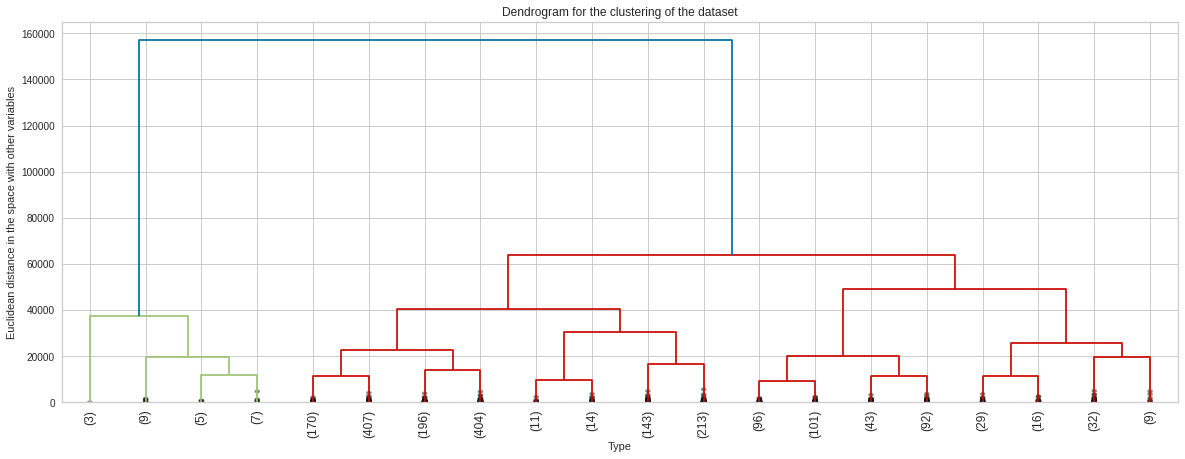

In [68]:
# Average Linkage - Average Distance between all points
Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True # to get a distribution impression in truncated branches 
)
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [69]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 ... 0 0 0]
{0: 1976, 1: 24}


In [70]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.72930877967469


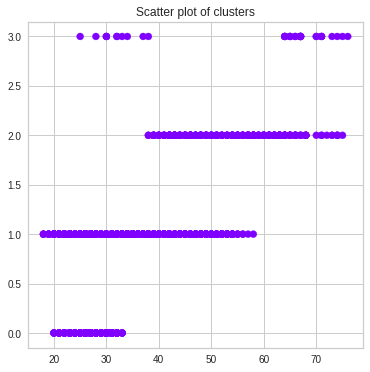

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

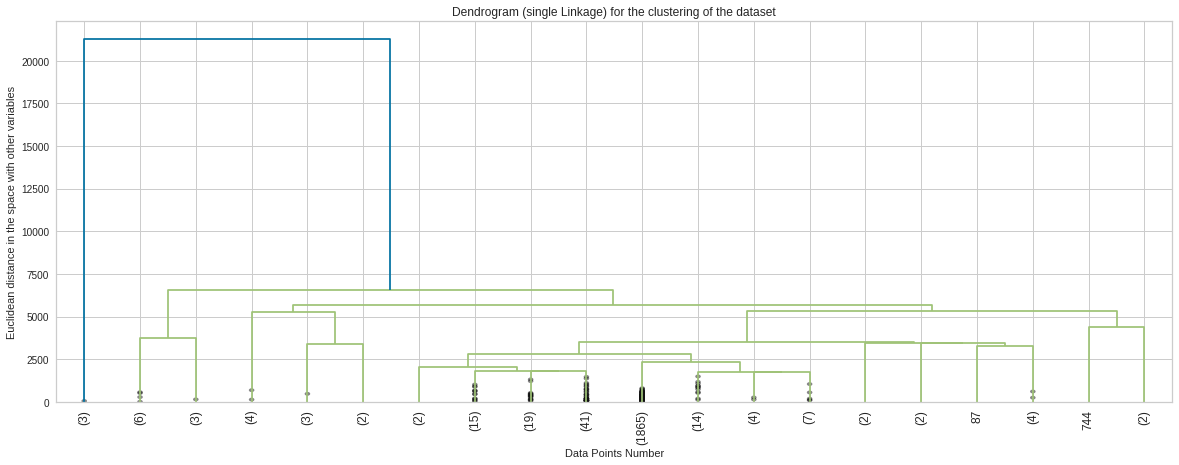

In [72]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

In [73]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 ... 0 0 0]
{0: 1997, 1: 3}


In [74]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.7585682251361909


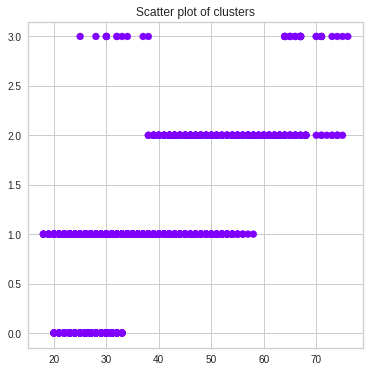

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [76]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train)
clus_B = model1_B.fit(X_train)
clus_C = model1_C.fit(X_train)
clus_D = model1_D.fit(X_train)
clus_E = model1_E.fit(X_train)
clus_F = model1_F.fit(X_train)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)

In [77]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[0 0 0 ... 0 0 0]
{0: 1976, 1: 24}
Silhouette Score for model A
0.72930877967469


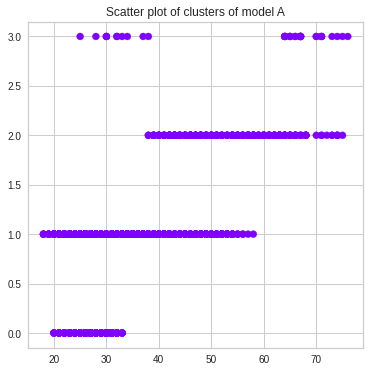

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [79]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[1 1 1 ... 1 1 1]
{0: 65, 1: 1935}
Silhouette Score for model B
0.6857830672441878


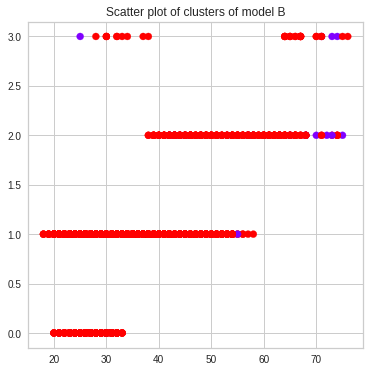

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [81]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 ... 0 0 0]
{0: 1973, 1: 27}
Silhouette Score for model C
0.28907449359272075


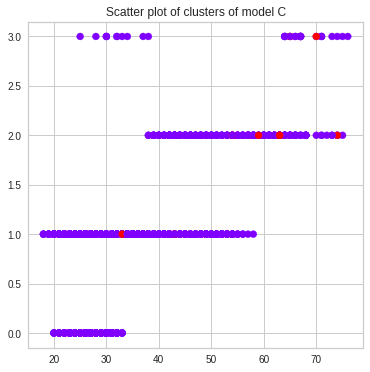

In [82]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()



---
## DBscan



In [83]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)

___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples

In [84]:
# dbscan = DBSCAN(eps =1.6,min_samples =25).fit(X_train)
# pred1 = dbscan.labels_
# print(pred1)
# # Frequency count of the Output clusters
# unique, counts = np.unique(pred1, return_counts=True)
# print(dict(zip(unique, counts)))
# # Silhouette Score
# print('Silhouette Score')
# print(silhouette_score(X_train,pred1))
# fig, ax = plt.subplots(figsize=(6, 6))

# scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

# legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
# ax.add_artist(legend)

# plt.title('Scatter plot of clusters')

# plt.show()



---
## GM


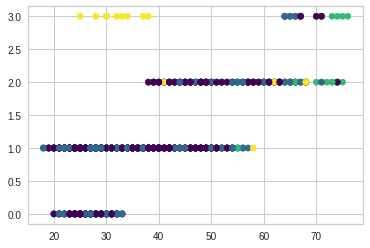

In [85]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gm = GaussianMixture(n_components=4).fit(X_train)
pred = gm.predict(X_train)
plt.scatter(X_train[:, 2], X_train[:,3], c=pred, s=40, cmap='viridis')
probs = gm.predict_proba(X_train)

In [86]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

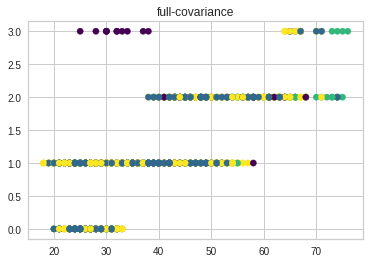

full-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for full cov: 0.16860110292548416


In [87]:
from sklearn import metrics # for calculating Silhouette score

cov_lst=['full','tied','diag','spherical']
preds=[]
probs=[]
gmms=[]
S=[]

for i in range(len(cov_lst)):
  gmm = GaussianMixture(n_components=4, covariance_type=cov_lst[i], random_state=42).fit(X_train)
  gmms.append(gmm)
  pred = gmm.predict(X_train)
  preds.append(pred)
  prob = gmm.predict_proba(X_train)
  probs.append(prob)
  S.append(metrics.silhouette_score(X_train,pred, metric='euclidean'))

# print(gmms)

  # print(i, pred )
  # print(preds)
plt.scatter(X_train[:,2], X_train[:, 3], c=preds[0], s=40, cmap='viridis')
plt.title('full-covariance')
plt.show()
print('full-covariance probs',probs[0][:5].round(3))
print('Silhouette scores for full cov:',S[0])

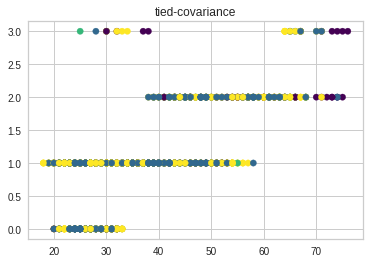

tied-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for tied cov: 0.15394943078597903


In [88]:
plt.scatter(X_train[:,2], X_train[:,3], c=preds[1], s=40, cmap='viridis')
plt.title('tied-covariance')
plt.show()
print('tied-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for tied cov:',S[1])

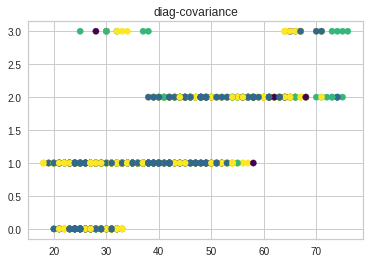

diag-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for diag cov: 0.04966678245297279


In [89]:
plt.scatter(X_train[:, 2], X_train[:,3], c=preds[2], s=40, cmap='viridis')
plt.title('diag-covariance')
plt.show()
print('diag-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for diag cov:',S[2])

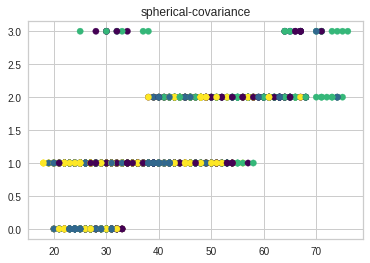

spherical-covariance probs [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
Silhouette scores for spherical cov: 0.45626242198584277


In [90]:
plt.scatter(X_train[:, 2], X_train[:,3], c=preds[3], s=40, cmap='viridis')
plt.title('spherical-covariance')
plt.show()
print('spherical-covariance probs',probs[3][:5].round(3))
print('Silhouette scores for spherical cov:',S[3])



---



---



## Normalization & repeated steps

In [91]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
print(X_train[0:5])
print(X_train_normalized[0:5])

[[     0      0     67      2 124670      1      2]
 [     1      1     22      1 150773      1      2]
 [     0      0     49      1  89210      0      0]
 [     0      0     45      1 171565      1      1]
 [     0      0     53      1 149031      1      1]]
[[0.         0.         0.84482759 0.66666667 0.32478101 0.5
  1.        ]
 [1.         1.         0.06896552 0.33333333 0.42021043 0.5
  1.        ]
 [0.         0.         0.53448276 0.33333333 0.19514353 0.
  0.        ]
 [0.         0.         0.46551724 0.33333333 0.49622348 0.5
  0.5       ]
 [0.         0.         0.60344828 0.33333333 0.41384189 0.5
  0.5       ]]


# kmeans 

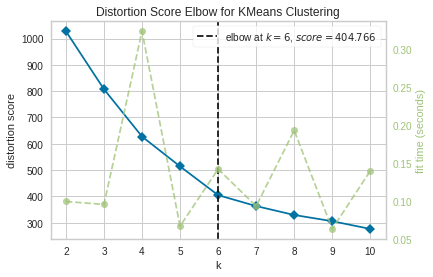

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train_normalized)    
elb_visualizer.show()  

_ k=6 is the best using elbow method

silhouette_scores [0.3908135700315586, 0.3569135304337949, 0.4023684317095256, 0.4224716320686519, 0.4372869061093281, 0.4438621302735813] 
 k_values [2, 3, 4, 5, 6, 7]


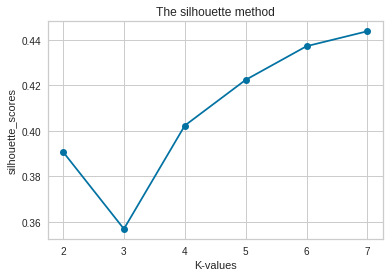

In [93]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train_normalized,8)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

_k=7 is the best with silhouette_scores equals  0.4438621302735813



---



---
## Hirarical clustering 



Text(0, 0.5, 'Euclidean distance in the space with other variables')

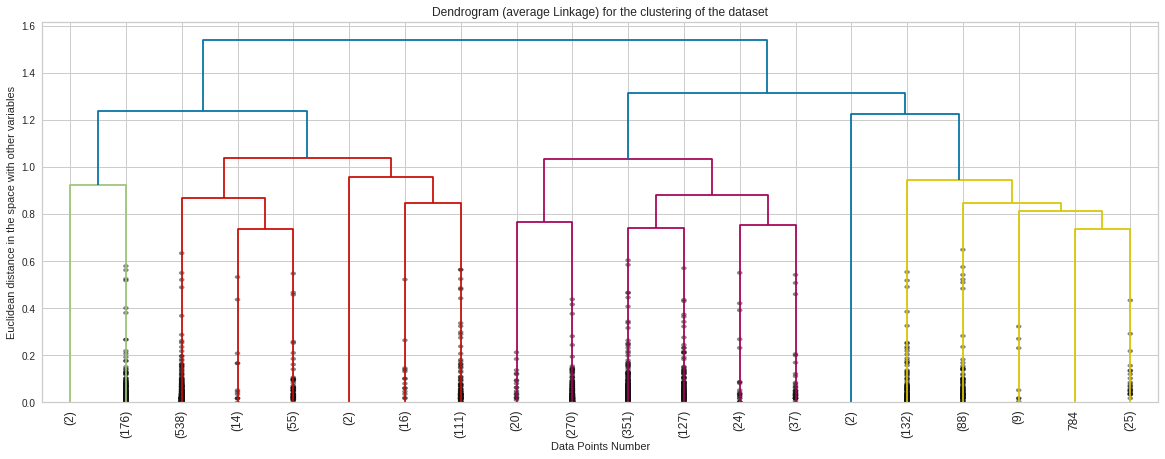

In [94]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train_normalized, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [95]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 1 0 ... 0 1 0]
{0: 1086, 1: 914}


In [96]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.3908135700315586


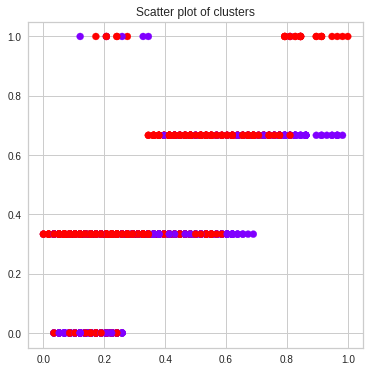

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,2], X_train_normalized[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

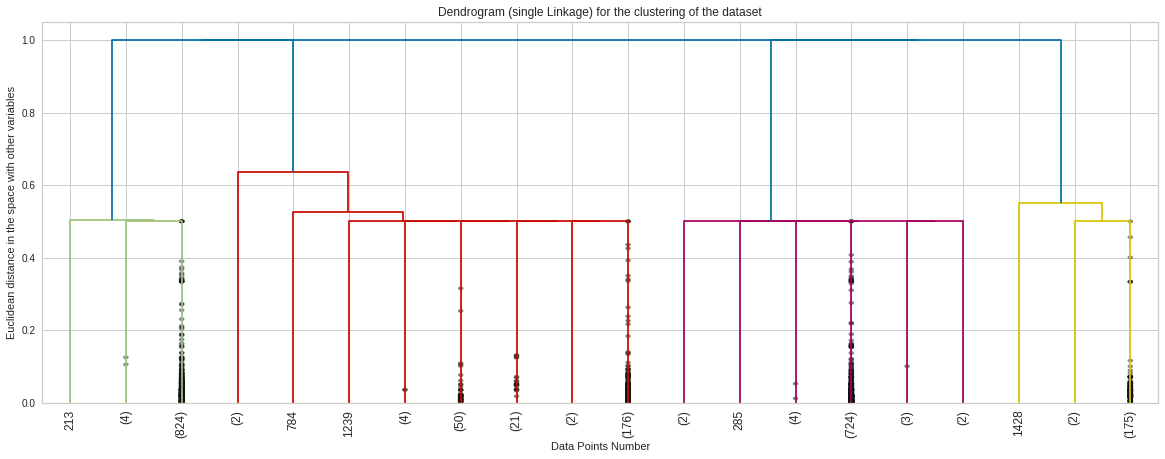

In [98]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train_normalized, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [99]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 0 1 ... 1 0 1]
{0: 914, 1: 1086}


In [100]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.3908135700315586


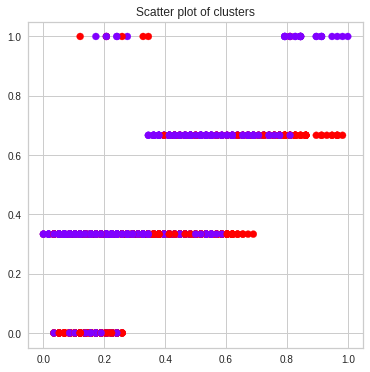

In [101]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,2], X_train_normalized[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [102]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train_normalized)
clus_B = model1_B.fit(X_train_normalized)
clus_C = model1_C.fit(X_train_normalized)
clus_D = model1_D.fit(X_train_normalized)
clus_E = model1_E.fit(X_train_normalized)
clus_F = model1_F.fit(X_train_normalized)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [103]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[0 1 0 ... 0 1 0]
{0: 1086, 1: 914}
Silhouette Score for model A
0.028696100044817225


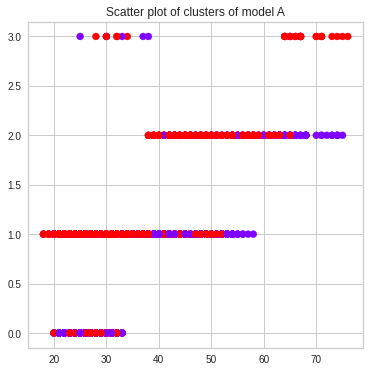

In [104]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [105]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[0 0 0 ... 0 0 0]
{0: 1998, 1: 2}
Silhouette Score for model B
0.11034231070570641


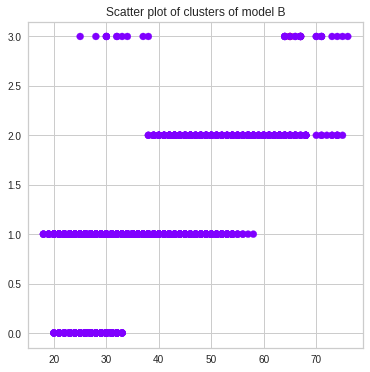

In [106]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [107]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 1 0 ... 0 1 0]
{0: 829, 1: 1171}
Silhouette Score for model C
0.04798127934381877


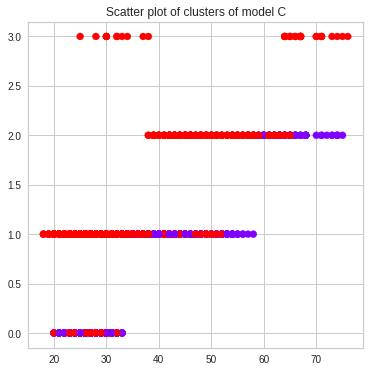

In [108]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [109]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[ 22 152 259 ... 195 586 294]
{0: 5, 1: 2, 2: 9, 3: 7, 4: 7, 5: 3, 6: 3, 7: 4, 8: 14, 9: 12, 10: 2, 11: 11, 12: 3, 13: 9, 14: 2, 15: 3, 16: 9, 17: 10, 18: 8, 19: 17, 20: 6, 21: 11, 22: 3, 23: 2, 24: 8, 25: 2, 26: 13, 27: 2, 28: 4, 29: 3, 30: 4, 31: 5, 32: 2, 33: 7, 34: 13, 35: 2, 36: 4, 37: 3, 38: 10, 39: 10, 40: 4, 41: 2, 42: 8, 43: 3, 44: 13, 45: 16, 46: 16, 47: 2, 48: 4, 49: 4, 50: 6, 51: 3, 52: 5, 53: 4, 54: 2, 55: 6, 56: 6, 57: 2, 58: 17, 59: 13, 60: 5, 61: 23, 62: 11, 63: 2, 64: 2, 65: 3, 66: 4, 67: 3, 68: 2, 69: 2, 70: 3, 71: 3, 72: 10, 73: 15, 74: 6, 75: 8, 76: 3, 77: 2, 78: 2, 79: 7, 80: 3, 81: 5, 82: 10, 83: 2, 84: 5, 85: 17, 86: 4, 87: 3, 88: 3, 89: 7, 90: 6, 91: 4, 92: 6, 93: 3, 94: 4, 95: 3, 96: 2, 97: 13, 98: 13, 99: 4, 100: 3, 101: 7, 102: 8, 103: 2, 104: 3, 105: 7, 106: 6, 107: 5, 108: 2, 109: 2, 110: 2, 111: 2, 112: 15, 113: 3, 114: 5, 115: 2, 116: 1, 117: 3, 118: 2, 119: 23, 120: 18, 121: 6, 122: 2, 123: 3, 124: 4, 125: 2, 126: 2, 127:

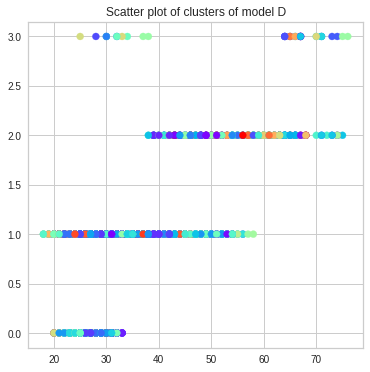

In [110]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

_note : model B & c are good with Silhouette Score 
0.6867350732769777



---



---
# DBscan 


In [111]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)

___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 2000}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples

In [112]:
# dbscan = DBSCAN(eps =1,min_samples =10).fit(X_train)
# pred1 = dbscan.labels_
# print(pred1)
# # Frequency count of the Output clusters
# unique, counts = np.unique(pred1, return_counts=True)
# print(dict(zip(unique, counts)))
# # Silhouette Score
# print('Silhouette Score')
# print(silhouette_score(X_train,pred1))
# fig, ax = plt.subplots(figsize=(6, 6))

# scatter = ax.scatter(X_train[:,2], X_train[:,3], c=pred1, cmap='rainbow')

# legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
# ax.add_artist(legend)

# plt.title('Scatter plot of clusters')

# plt.show()



---



---

# GM

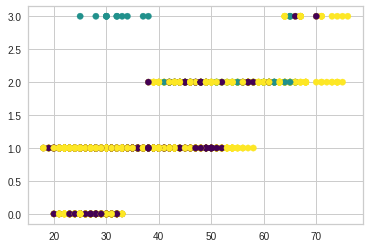

In [113]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gm = GaussianMixture(n_components=3).fit(X_train)
pred = gm.predict(X_train)
plt.scatter(X_train[:,2], X_train[:,3], c=pred, s=40, cmap='viridis')
probs = gm.predict_proba(X_train)

In [114]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

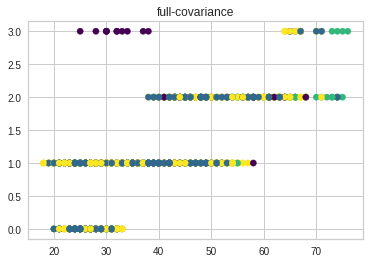

full-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for full cov: 0.16860110292548416


In [115]:
from sklearn import metrics # for calculating Silhouette score

cov_lst=['full','tied','diag','spherical']
preds=[]
probs=[]
gmms=[]
S=[]

for i in range(len(cov_lst)):
  gmm = GaussianMixture(n_components=4, covariance_type=cov_lst[i], random_state=42).fit(X_train)
  gmms.append(gmm)
  pred = gmm.predict(X_train)
  preds.append(pred)
  prob = gmm.predict_proba(X_train)
  probs.append(prob)
  S.append(metrics.silhouette_score(X_train,pred, metric='euclidean'))

# print(gmms)

  # print(i, pred )
  # print(preds)
plt.scatter(X_train[:,2], X_train[:,3], c=preds[0], s=40, cmap='viridis')
plt.title('full-covariance')
plt.show()
print('full-covariance probs',probs[0][:5].round(3))
print('Silhouette scores for full cov:',S[0])

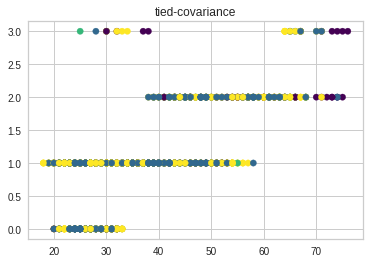

tied-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for tied cov: 0.15394943078597903


In [116]:
plt.scatter(X_train[:,2] , X_train[:,3], c=preds[1], s=40, cmap='viridis')
plt.title('tied-covariance')
plt.show()
print('tied-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for tied cov:',S[1])

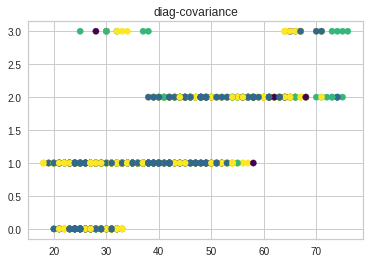

diag-covariance probs [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
Silhouette scores for diag cov: 0.04966678245297279


In [117]:
plt.scatter(X_train[:, 2], X_train[:,3], c=preds[2], s=40, cmap='viridis')
plt.title('diag-covariance')
plt.show()
print('diag-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for diag cov:',S[2])

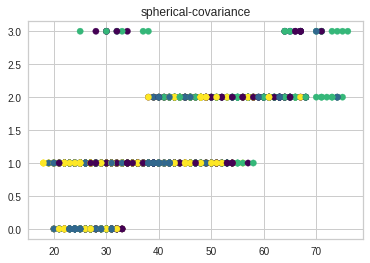

spherical-covariance probs [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
Silhouette scores for spherical cov: 0.45626242198584277


In [118]:
plt.scatter(X_train[:,2], X_train[:,3], c=preds[3], s=40, cmap='viridis')
plt.title('spherical-covariance')
plt.show()
print('spherical-covariance probs',probs[3][:5].round(3))
print('Silhouette scores for spherical cov:',S[3])

_note : Silhouette score for spherical cov:0.45626242198584277 is the best 

# conclusion 
Before normalization:
- for kmeans K=3 is the best using  silhouette_score 0.5528190123564095 
- for hirarical ,silhouette_score 0.6867350732769777 models A&B
- for Dbscan , eps= 1.6 min_samples= 25 Silhouette Score 0.6867350732769777
- for GM ,Silhouette scores for spherical cov: 0.4953713128303148


After normalization :
- for kmeans K=2 is the best using  silhouette_score 0.6300471284354711
- for hirarical ,silhouette_score 0.6867350732769777 models A&B&C
- for Dbscan , when eps= 1 and min_samples=10 ,with Silhouette Score 0.6867350732769777
- for GM ,Silhouette scores for spherical cov: 0.4953713128303148